# Подключение к google диску и распаковка zip архива

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
!ls gdrive/My\ Drive/Hillel/*

In [ ]:
!unzip gdrive/My\ Drive/Hillel/dataz.zip -d gdrive/My\ Drive/Hillel

Archive:  gdrive/My Drive/Hillel/dataz.zip
   creating: gdrive/My Drive/Hillel/data/
   creating: gdrive/My Drive/Hillel/data/RELIGION/
   creating: gdrive/My Drive/Hillel/data/RELIGION/SEASONAL/
  inflating: gdrive/My Drive/Hillel/data/RELIGION/SEASONAL/SEASONAL.TXT  
   creating: gdrive/My Drive/Hillel/data/RELIGION/BIBLEJ/
  inflating: gdrive/My Drive/Hillel/data/RELIGION/BIBLEJ/BIBLEJ.TXT  
   creating: gdrive/My Drive/Hillel/data/RELIGION/MORMON/
  inflating: gdrive/My Drive/Hillel/data/RELIGION/MORMON/MORMON.TXT  
   creating: gdrive/My Drive/Hillel/data/RELIGION/BIBLE/
  inflating: gdrive/My Drive/Hillel/data/RELIGION/BIBLE/BIBLE.TXT  
   creating: gdrive/My Drive/Hillel/data/JOURNAL/
   creating: gdrive/My Drive/Hillel/data/JOURNAL/DRAGON_Z/
  inflating: gdrive/My Drive/Hillel/data/JOURNAL/DRAGON_Z/DRAGON_Z.TXT  
   creating: gdrive/My Drive/Hillel/data/JOURNAL/PHRACK47/
  inflating: gdrive/My Drive/Hillel/data/JOURNAL/PHRACK47/PHRACK47.TXT  
   creating: gdrive/My Drive/Hillel

In [ ]:
!apt install tree

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  tree
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 40.7 kB of archives.
After this operation, 105 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tree amd64 1.7.0-5 [40.7 kB]
Fetched 40.7 kB in 0s (99.7 kB/s)
Selecting previously unselected package tree.
(Reading database ... 144487 files and directories currently installed.)
Preparing to unpack .../tree_1.7.0-5_amd64.deb ...
Unpacking tree (1.7.0-5) ...
Setting up tree (1.7.0-5) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


In [ ]:
!tree data

# Работа с директориями 
Импортируем все нужные библиотеки


In [ ]:
!pip install nltk
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_cat.zip.
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_esp.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipp

True

In [ ]:
import os
import re
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer

In [ ]:
genres = os.listdir('/content/gdrive/My Drive/Hillel/data')
print(genres)

['ADVENTUR', 'CHILD', 'DETECT', 'FANTAST', 'RELIGION', 'TALES', 'JOURNAL']


In [ ]:
genres_files = { genre:os.listdir('/content/gdrive/My Drive/Hillel/data/'+genre) for genre in genres}

In [ ]:
print(genres_files['JOURNAL'])
print(genres_files['ADVENTUR'])


['INQ-08', 'PHRACK47', 'ANSIBLE', 'DELREY', 'NTM_18', 'QUANTA17', 'DRAGON_Z', 'FSF1-11']
['MRMEN10', 'CAROLCHR', 'SAWY1', 'DOUGL2', 'TMUCK10', 'OPION', 'HFINN', 'ALEXBR', 'IVANHOE', 'TARZ2', 'CANSUCH', 'TARZ3', 'MOBYDICK', 'CALLWILD', 'LORD_JIM', 'TARZ1', 'BADAM10', 'JBARL10', 'POLST10', 'WARPRYER', 'FRDAM10', 'CLOVIS', 'LMISS11', '2CITY', 'RFENG10', 'PUDDN', 'TARZ4', 'SAWY2', 'DOUGLASS', 'ISLNI10', 'STIVE10', 'SAWY3', 'JUSTDAV', 'GLDNA10', 'FIRE', 'SHARERXT', 'STRKM10', 'EIGHTY_D', 'TARZ5']


# Чтение файлов и их очистка, лемматизация

In [ ]:

def clear_text(text):
  wordnet_lemmatizer = WordNetLemmatizer()
  line = re.sub("[^A-Za-z]", " ", text.strip())
  nltk_tokens = nltk.word_tokenize(line)
  line = ' '.join([wordnet_lemmatizer.lemmatize(w) for w in nltk_tokens])
  return line 

In [ ]:
genre_folder_data  = {}
for genre_folder, below_folders in genres_files.items():
  data_list = []
  for folder in below_folders:
    try:
      with open('/content/gdrive/My Drive/Hillel/data/'+genre_folder+'/'+folder+'/'+folder+'.txt') as f:
        data = f.read()
        clear_data = clear_text(data)
        data_list.append(clear_data)
    except Exception:
      with open('/content/gdrive/My Drive/Hillel/data/'+genre_folder+'/'+folder+'/'+folder+'.txt',encoding="utf8",errors='ignore') as f:
        print(f)
        data = f.read()
        clear_data = clear_text(data)
        data_list.append(clear_data) 
  genre_folder_data[genre_folder] = data_list
  


<_io.TextIOWrapper name='/content/gdrive/My Drive/Hillel/data/CHILD/alices_adventures_in_wonderland/alices_adventures_in_wonderland.txt' mode='r' encoding='utf8'>
<_io.TextIOWrapper name='/content/gdrive/My Drive/Hillel/data/CHILD/the_wonderful_wizard_of_oz/the_wonderful_wizard_of_oz.txt' mode='r' encoding='utf8'>
<_io.TextIOWrapper name='/content/gdrive/My Drive/Hillel/data/CHILD/s_nephew/s_nephew.txt' mode='r' encoding='utf8'>
<_io.TextIOWrapper name='/content/gdrive/My Drive/Hillel/data/CHILD/Matveev_Krasavica-i-chudovishche-Zolushka-Spyashchaya-krasavica-Rapuncel-Volshebnaya-lampa-Aladdina-The-Beauty-and-the-Beast-Cinderella-The-Sleeping-Beauty-Rapunzel-The-Story-of-Aladdin-and-the-Wonderf/Matveev_Krasavica-i-chudovishche-Zolushka-Spyashchaya-krasavica-Rapuncel-Volshebnaya-lampa-Aladdina-The-Beauty-and-the-Beast-Cinderella-The-Sleeping-Beauty-Rapunzel-The-Story-of-Aladdin-and-the-Wonderf.txt' mode='r' encoding='utf8'>
<_io.TextIOWrapper name='/content/gdrive/My Drive/Hillel/data/CH

# Считаем общее количество слов в каждом жанре

In [ ]:
def count_genre_words(list_of_texts, genre):
  count = 0
  for i in range(0,len(list_of_texts)):
     count += len(genre_folder_data[genre][i].lower().split())
  return count

In [ ]:
genres_total_words = { genre : count_genre_words(genre_folder_data[genre], genre) for genre in genres}

In [ ]:
print('Count of words |Genre')
print(genres_total_words['ADVENTUR'], '       |ADVENTUR')
print(genres_total_words['CHILD'], '       |CHILD')
print(genres_total_words['DETECT'], '       |DETECT')
print(genres_total_words['FANTAST'], '       |FANTAST')
print(genres_total_words['JOURNAL'], '       |JOURNAL')
print(genres_total_words['RELIGION'], '       |RELIGION')
print(genres_total_words['TALES'], '       |TALES')

Count of words |Genre
2752882        |ADVENTUR
1716127        |CHILD
2899771        |DETECT
1252756        |FANTAST
2195458        |JOURNAL
1905971        |RELIGION
1030839        |TALES


In [ ]:
print(genre_folder_data['JOURNAL'][3])

The Del Rey Internet Newsletter is a monthy electronic publication for science fiction and fantasy reader It includes publication data on Del Rey book hype le description of book new in the store selected Del Rey bibliography special publishing announcement a Q A section an intermittent behind the scene editorial about some aspect of sf f publishing and an In Depth section written by author cover artist designer and other people in different part of the publishing industry who talk about their job in an entertaining interesting and or witty way The DRIN is not a promotional tool devised by marketing and publicity department but an editorial project designed to make contact with reader share information and provide a forum for two way dialogue As such it doesn t list price avoids hype and marketing language and tell the truth It is posted at the beginning of every month on the rec art sf written newsgroup and is also available on CompuServe GEnie BIX various local BBSs the Del Rey file 

# Сохраняем "Очищенные данные" в новые файлы по жанрам в папку cleaned_data

In [ ]:
for genre in genre_folder_data.keys():
  count_files = len(genre_folder_data[genre])
  try:
    with open('/content/gdrive/My Drive/Hillel/cleaned_data/'+genre+'.txt','w') as write_file:
      for i in range(0,count_files):
        write_file.write(genre_folder_data[genre][i])
  except Exception:
    with open('/content/gdrive/My Drive/Hillel/cleaned_data/'+genre+'.txt','w', encoding='utf-8') as write_file:
      for i in range(0, count_files):
        write_file.write(genre_folder_data[genre][i])

# Переводим "очищенный текст" в словари

In [ ]:
def texts_to_vocabulary(list_of_texts):
  dictionary = {}
  for i in range(0,len(list_of_texts)):
    for item in list_of_texts[i].lower().split():
      if item in dictionary:
        dictionary[item] +=1
      else:
        dictionary[item] = 1
  return dictionary


In [ ]:
genres_vocab = { genre : texts_to_vocabulary(genre_folder_data[genre]) for genre in genres}

In [ ]:
genres_vocab['CHILD']

{'lewis': 1,
 'carroll': 1,
 'alice': 79,
 's': 8543,
 'adventure': 102,
 'in': 22161,
 'wonderland': 1,
 'chapter': 345,
 'i': 28283,
 'down': 4244,
 'the': 92763,
 'rabbit': 219,
 'hole': 355,
 'wa': 25157,
 'beginning': 194,
 'to': 43445,
 'get': 2571,
 'very': 3460,
 'tired': 279,
 'of': 30604,
 'sitting': 568,
 'by': 3837,
 'her': 17625,
 'sister': 540,
 'on': 12074,
 'bank': 105,
 'and': 60758,
 'having': 378,
 'nothing': 1380,
 'do': 4339,
 'once': 1599,
 'or': 3367,
 'twice': 151,
 'she': 20254,
 'had': 12168,
 'peeped': 29,
 'into': 4582,
 'book': 1212,
 'reading': 154,
 'but': 11005,
 'it': 27138,
 'no': 4619,
 'picture': 329,
 'conversation': 161,
 'what': 6788,
 'is': 6625,
 'use': 397,
 'a': 48981,
 'thought': 2246,
 'without': 898,
 'so': 7310,
 'considering': 40,
 'own': 982,
 'mind': 910,
 'well': 3048,
 'could': 4646,
 'for': 11437,
 'hot': 288,
 'day': 2490,
 'made': 2149,
 'feel': 742,
 'sleepy': 39,
 'stupid': 144,
 'whether': 313,
 'pleasure': 125,
 'making': 488,


# Создаем словарь датафреймов

In [ ]:
genres_data_frames = {genre: {'Keys':pd.Series(list(genres_vocab[genre].keys())),'Values':pd.Series(list(genres_vocab[genre].values()))} for genre in genres}

In [ ]:
genres_data_frames['ADVENTUR']['Values']

0        173277
1           138
2          2953
3            71
4           220
          ...  
41204         1
41205         1
41206         1
41207         1
41208         1
Length: 41209, dtype: int64

In [ ]:
genres_data_frames['ADVENTUR']['Keys']

0                    the
1                  merry
2                    men
3                 robert
4                  louis
              ...       
41204      substanceless
41205    defenselessness
41206        refurnished
41207         greystokes
41208        weatherworn
Length: 41209, dtype: object

# Добавляем новую колонку к словарю 

In [ ]:
for genre in genres:
  genres_data_frames[genre]['Prop'] = genres_data_frames[genre]['Values'].apply(lambda x: x/genres_total_words[genre])


# Выводим для каждого жанра его датафрейм

In [ ]:
for genre in genres:
  print(f' Total count of words: {genres_total_words[genre]} in {genre}')
  print(pd.DataFrame.from_dict(genres_data_frames[genre]))
  print('-'*50)

 Total count of words: 2752882 in ADVENTUR
                  Keys  Values          Prop
0                  the  173277  6.294385e-02
1                merry     138  5.012928e-05
2                  men    2953  1.072694e-03
3               robert      71  2.579115e-05
4                louis     220  7.991625e-05
...                ...     ...           ...
41204    substanceless       1  3.632557e-07
41205  defenselessness       1  3.632557e-07
41206      refurnished       1  3.632557e-07
41207       greystokes       1  3.632557e-07
41208      weatherworn       1  3.632557e-07

[41209 rows x 3 columns]
--------------------------------------------------
 Total count of words: 1716127 in CHILD
            Keys  Values          Prop
0          lewis       1  5.827075e-07
1        carroll       1  5.827075e-07
2          alice      79  4.603389e-05
3              s    8543  4.978070e-03
4      adventure     102  5.943616e-05
...          ...     ...           ...
31801  coworkers       1  5

# Рисуем графики для каждого жанра

In [ ]:
def visualize_data(genre_df, genre_name):
  genre_df = genre_df.sort_values(by = ['Values'], ascending = False)
  fig, ax = plt.subplots()
  ax.bar(genre_df['Keys'][:30], genre_df['Prop'][:30])
  ax.set_title(genre_name)

  fig.set_size_inches(30.5, 6.5)
  plt.show()

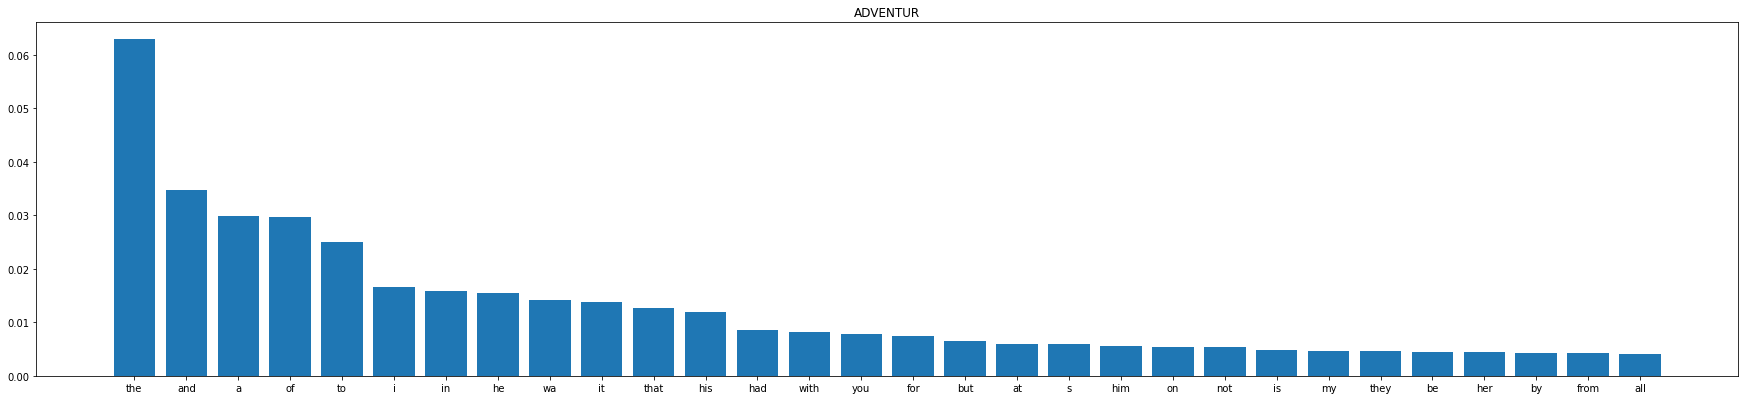

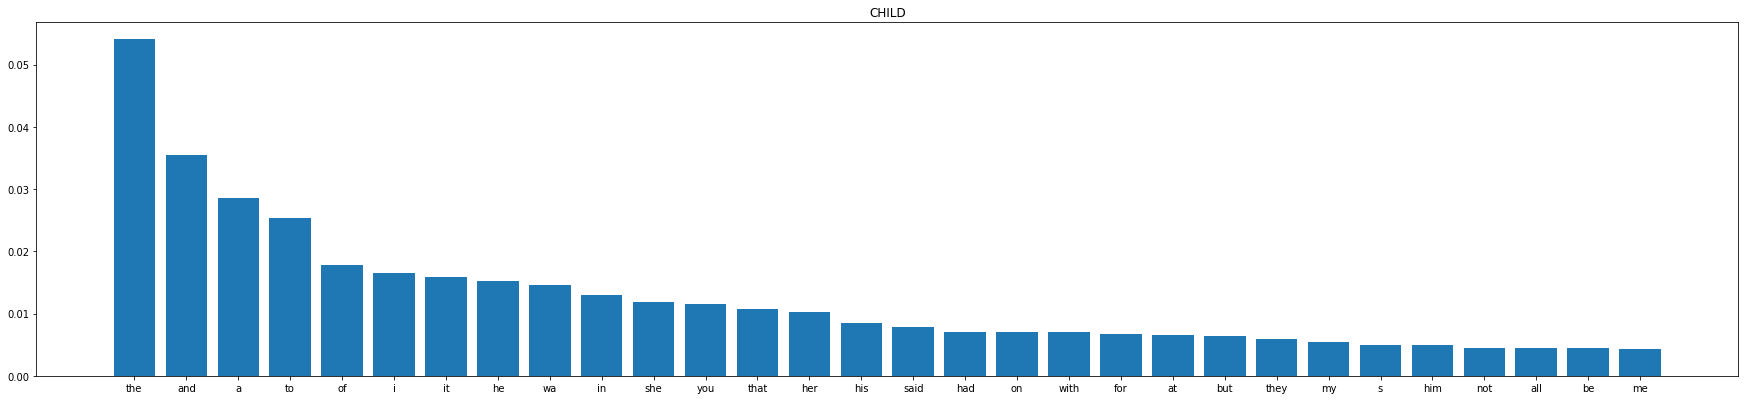

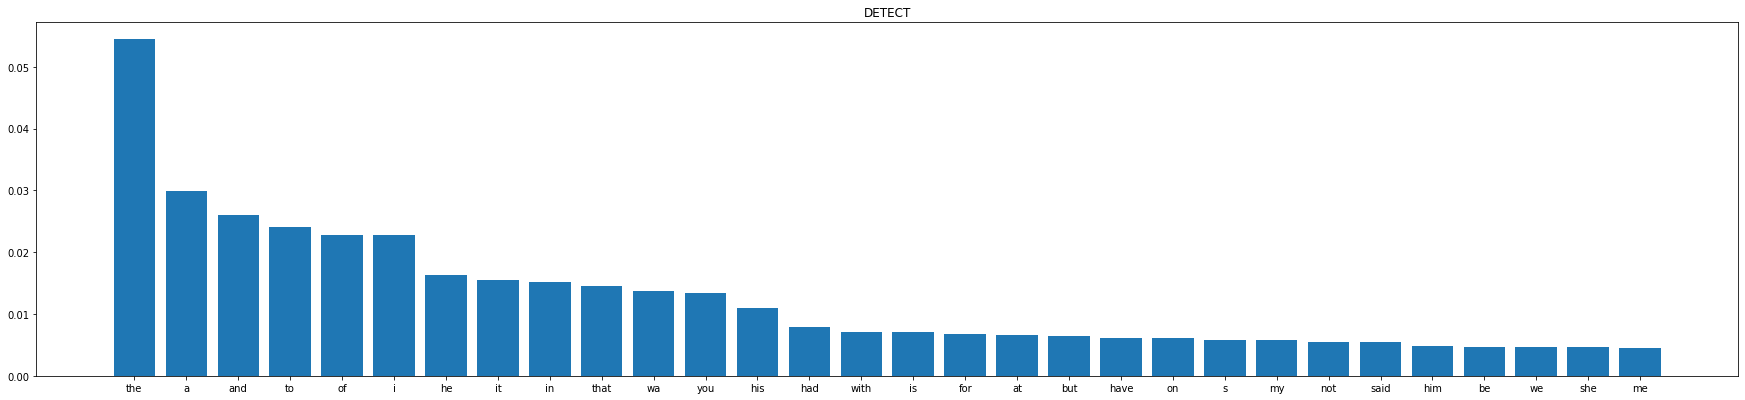

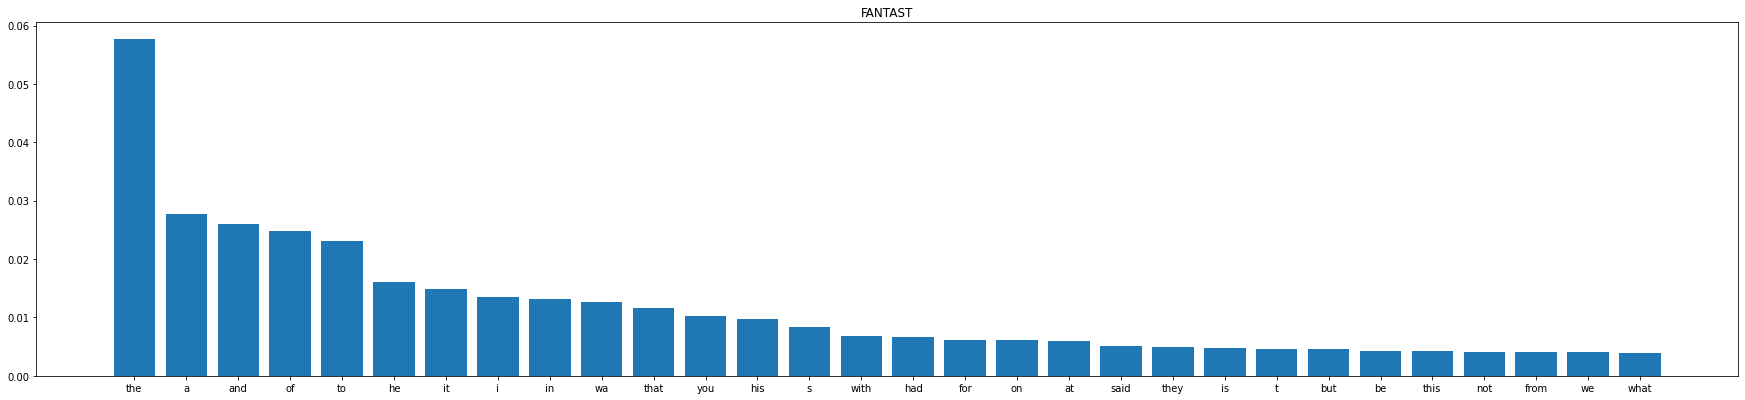

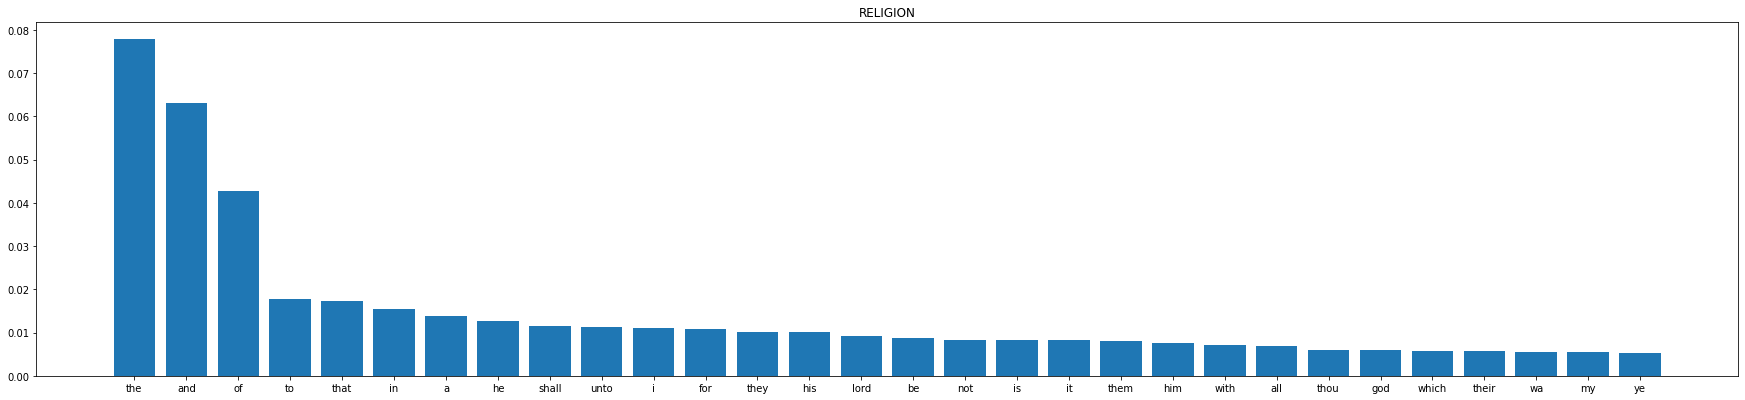

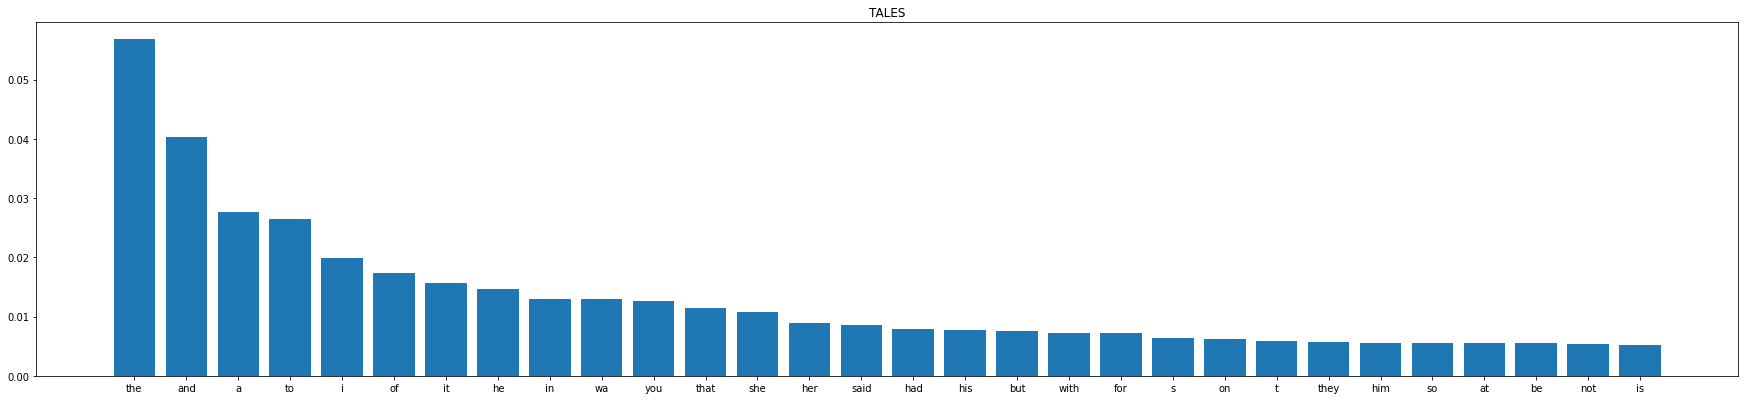

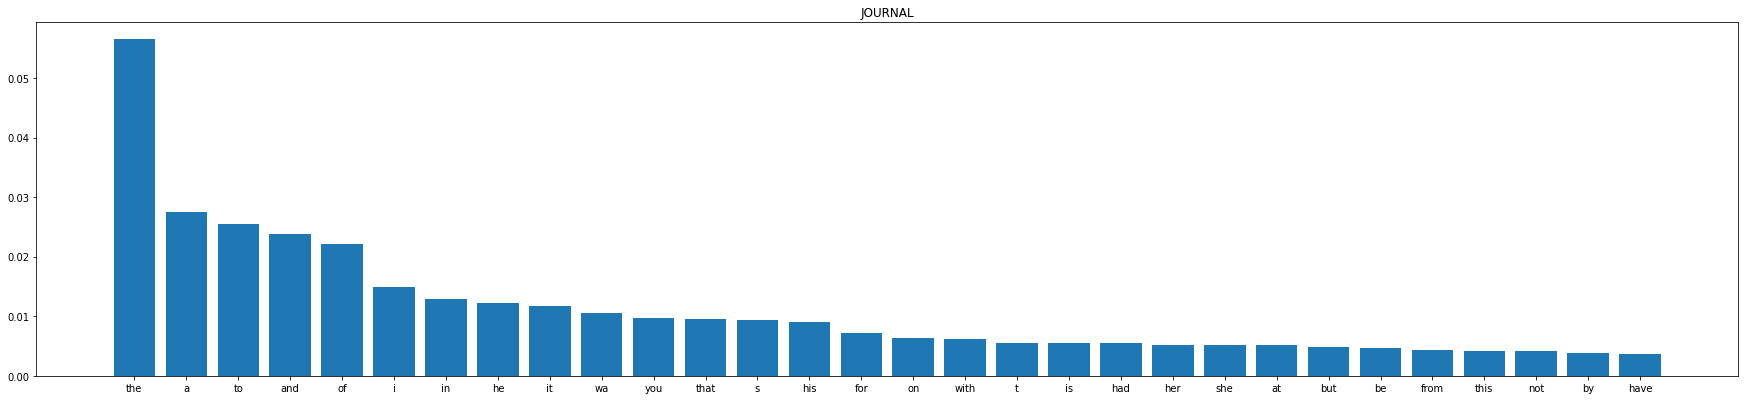

In [ ]:
for genre in genres:
  visualize_data(pd.DataFrame.from_dict(genres_data_frames[genre]), genre)

# Сохраняем Дата фреймы в разные csv файлы

In [ ]:
for genre in genres:
  pd.DataFrame.from_dict(genres_data_frames[genre]).to_csv('/content/gdrive/My Drive/Hillel/csv_data/'+genre+'.csv')